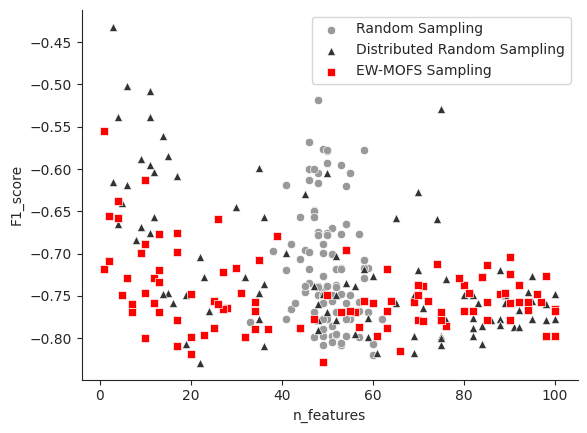

In [6]:
import seaborn as sns
from sklearn.datasets import make_classification
import multiprocessing, os
import numpy as np
from pymoo.core.problem import Problem, ElementwiseProblem, StarmapParallelization
from functions import *

def _init_evaluator(X, y):
    global pid_, X_worker, y_worker
    pid_ = os.getpid()
    X_worker = np.array(X).copy()
    y_worker = np.ravel(y).copy()

try:
    pool.close()
    _pool.close()
except:
    pass
    
n_process = 48

X, y = make_classification(random_state=42, n_samples = 100, n_features = 100, n_informative = 10, n_redundant=10, n_repeated=10)

sns.set_style('ticks')
pool = multiprocessing.Pool(n_process, initializer=_init_evaluator(np.zeros((100,100)),np.zeros(100)))
runner = StarmapParallelization(pool.starmap)
problem = GeneSelection(X = X, y = y, runner=runner)

classifier = DecisionTreeClassifier()

individuals = BinaryRandomSampling().do(problem, n_samples = 100)
x = []
eval = []
for i in individuals:
    x.append(i.X.sum())
    eval.append(-np.array(cross_val_score(classifier, X[:,i.X], y, cv=3, scoring='f1_macro')).mean())
data = pd.DataFrame({'F1_score' : eval,
                    'n_features' : x})
ax = sns.scatterplot(data = data, y = 'F1_score', x = 'n_features',marker = 'o', color='#999999')

##################################################################################################33

individuals = BinaryDistributedWeightsSampling(max_features = 100, seed = 11).do(problem, n_samples = 100)
x = []
eval = []
for i in individuals:
    x.append(i.X.sum())
    eval.append(-np.array(cross_val_score(classifier, X[:,i.X], y, cv=3, scoring='f1_macro')).mean())
data = pd.DataFrame({'F1_score' : eval,
                    'n_features' : x})
ax = sns.scatterplot(data = data, y = 'F1_score', x = 'n_features',marker = '^', color='#333333')

ax.legend(['Random Sampling', 'Distributed Random Sampling'], loc='lower right')

##################################################################################################
rf = getRF(X,y)
individuals = BinaryDistributedWeightsSampling(max_features = 100, seed = 11, sampling_weights = rf).do(problem, n_samples = 100)
x = []
eval = []
for i in individuals:
    x.append(i.X.sum())
    eval.append(-np.array(cross_val_score(classifier, X[:,i.X], y, cv=3, scoring='f1_macro')).mean())
data = pd.DataFrame({'F1_score' : eval,
                    'n_features' : x})
ax = sns.scatterplot(data = data, y = 'F1_score', x = 'n_features',marker = 's', color='red')

ax.legend(['Random Sampling', 'Distributed Random Sampling', 'EW-MOFS Sampling'], loc='upper right')
sns.despine()
